<h2>Fernando Limón Flores</h2> 
<h3>A00819824</h3>
<h2>Héctor Noel León Quiroz</h2> 
<h3>A01251806</h3>
<h2>Ricardo Marcelo Lozano Gil</h2> 
<h3>A01176405</h3>
<h2>Alitzel Adriana Macías Infante</h2> 
<h3>A01373166</h3>
<h2>Adrián Ricardo Mancilla Uribe</h2> 
<h3>A01196967</h3>

<h3>Actividad Integradora</h3>

In [170]:
import requests
from bs4 import BeautifulSoup
import re

In [171]:
URL = 'https://www.worldometers.info/coronavirus/'
page = requests.get(URL)

In [172]:
soup = BeautifulSoup(page.content, 'html.parser')
script = soup.find_all('script', type='text/javascript')

#Cast to string
stringTag = str(script[9])

In [173]:
#Find date data in the string
categoriesStr = 'categories: ["'
dateLowerBound = stringTag.find(categoriesStr)
dateUpperBound = stringTag.find(']', dateLowerBound + len(categoriesStr))

In [174]:
dirtyDates = stringTag[dateLowerBound + len(categoriesStr): dateUpperBound - 1].split('"')
Date = list(filter(lambda a: a != ",", dirtyDates))

In [175]:
#Find number of cases in the string
dataStr = 'data: ['
dataLowerBound = stringTag.find(dataStr)
dataUpperBound = stringTag.find(']', dataLowerBound + len(dataStr))

In [176]:
cases = stringTag[dataLowerBound + len(dataStr): dataUpperBound].split(',')
cases = list(map(int, cases))

In [177]:
# Format for model training
X = np.arange(0, len(Date), dtype=int).reshape(-1,1)
y = np.array(cases)


In [178]:
#Linear Regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [179]:
# Fit model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

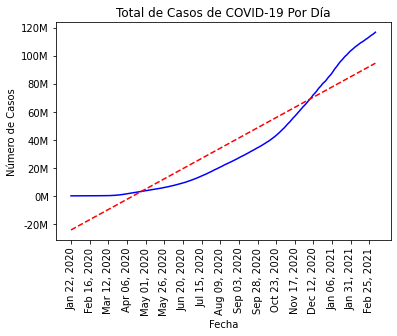

In [180]:
# Plot data and model

# Adding a bit of format
def millions(x, pos):
    """The two args are the value and tick position."""
    return '{:1.0f}M'.format(x*1e-6)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(millions)

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Total de Casos de COVID-19 Por Día')

# Using all dates as labels will cause them to overlap, only use some
xpos = np.arange(len(Date))
plt.xticks(xpos[0::25], Date[0::25], rotation='vertical')


ax.plot(X, y,color='b')
ax.plot(X, model.predict(X), 'r--')



plt.show()